# 1. 문제정의 


  ## 1.1 경진대회 소개

- 물류 유통량 예측 경진 대회 (회귀모델)

- 제주시 내 택배 운송 데이터를 이용하여 운송량 예측 AI 개발

- https://dacon.io/competitions/official/235867/overview/description

- 주최 : 국토연구원
- 주관 : 데이콘 
    ### 1.1.1 평가
  - 평가산식 : RMSE
  - Public 평가 : 테스트 데이터 중 랜덤 샘플 된 50%로 채점
  - Private 평가 : 나머지 50 % 테스트 데이터로 채점

    ### 1.1.2 배경
    - 코로나 19는 경제, 사회 분야의 구조적 변화를 촉발하여 비대면화와 디지털 전환을 가속화 시키고 있으며, 
    비대면 거래의 증가에 따라 2020년 택배 물량은 약 30억 건으로 전년 대비 21% 급증하였습니다.

    - 이에 따라 택배 운송량을 예측하여 비대면 경제의 발전을 예측하기 위한 경진대회를 개최합니다(사례지역:제주도).
    더욱 효율적인 물류 유통을 위해 택배 운송량을 예측해주세요! 

    ### 1.1.3 데이터 분석 대상
    - train : 총 31,684행의 데이터 5열
    - test : 총 7,920행의 데이터 4열("운송장_건수" 제외)

    => train 데이터를 이용해 모델을 학습 시킨 뒤 test 데이터를 활용해 **"운송장_건수 "** 예측

    

## 1.2 데이터 도메인 정보
- index : 인덱스
- 송하인_격자공간고유번호 : 
- 수하인 격자공간고유번호 : 
- 물품_카테고리 : 물품 종류
- 운송장_건수 : 

## 1.3 평가척도
=> 참가자가 최종적으로 제출한 결과물의 우열을 판단하는 척도

- 본 대회에서는 RMSE라는 평가척도를 적용합니다. 이 RMSE 값은 회귀모델에서 평가지표로 사용하는 지표 중 하나이다.

## 1.4 문제 해결을 위한 접근 방식


- **EDA -> 전처리 -> 데이터 모델링 -> 결과 확인 ->모델링 성능 개선**

## 1.5 섹션 아이디어

[1229]

  - 송하인이나 수하인이 같은경우? -> 고정적으로 택배 배송을 하는경우가 있을까?

# 2. 데이터 간단히 탐색

In [1]:
# 버젼 설정
today = "0104"

## 2.2 데이터 로드


### 2.2.1 학습 데이터

In [2]:
!pip install pycaret
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 학습 데이터 로드
X = pd.read_csv("/content/drive/Shareddrives/A-2/data/물류/train.csv")

In [4]:
# 학습 데이터 기본 정보 파악
display(X.info())

display(X.head())

display(X.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31684 entries, 0 to 31683
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         31684 non-null  int64 
 1   송하인_격자공간고유번호  31684 non-null  int64 
 2   수하인_격자공간고유번호  31684 non-null  int64 
 3   물품_카테고리       31684 non-null  object
 4   운송장_건수        31684 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


None

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,운송장_건수
0,0,5011000595017300,2871000192069300,음반,3
1,1,4148000690043300,5011000264024400,문화컨텐츠,3
2,2,5011000078068400,1120000007005400,농산물,3
3,3,4127100048006400,5011000587019400,기타식품,7
4,4,5011000078068400,2823700010076300,농산물,3


,index,송하인_격자공간고유번호,수하인_격자공간고유번호,운송장_건수
count,31684.000000,3.168400e+04,3.168400e+04,31684.000000
mean,15841.500000,4.648814e+15,3.801369e+15,4.879308
std,9146.527301,8.341336e+14,1.314660e+15,6.756473
min,0.000000,1.111000e+15,1.111000e+15,3.000000
25%,7920.750000,4.713000e+15,2.826000e+15,3.000000
50%,15841.500000,5.011000e+15,4.159000e+15,3.000000
75%,23762.250000,5.013001e+15,5.011000e+15,5.000000
max,31683.000000,5.013001e+15,5.013001e+15,413.000000


- 송하인 격자고유번호 별로 확인?
- 수하인 격자고유번호 별로 확인

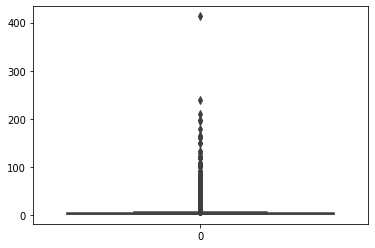

In [5]:
# 이상치 좀 더 확인
sns.boxplot(data = X['운송장_건수'])
plt.show()

- 이상치가 존재한다고 보여지는데,,,

In [6]:
#결측값 추출
display(pd.DataFrame(X.isnull().sum()).T)

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,운송장_건수
0,0,0,0,0,0


- 결측값이 없다.

In [7]:
# 중복데이터 확인
temp = X.drop("index",axis = 1)
print(temp.duplicated().sum())

display(temp[temp.duplicated()])


0


,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,운송장_건수


- 중복데이터가 없다.

In [8]:
display(X["송하인_격자공간고유번호"].value_counts())
display(X["수하인_격자공간고유번호"].value_counts())


5011000078068400    3882
5013000610049100    1790
5013000731055200    1235
5011000137030100    1137
5013000821028200     731
                    ... 
4313000554077200       1
5013000868030300       1
1165000018039100       1
2638000028097200       1
1147000002005400       1
Name: 송하인_격자공간고유번호, Length: 4229, dtype: int64

5013000635005300    35
5011000543041100    33
5011000314069300    33
5011000544072300    30
5011000318044100    30
                    ..
1141000008065400     1
4783000207071400     1
3017000014085200     1
5013000640012300     1
2726000056072100     1
Name: 수하인_격자공간고유번호, Length: 26875, dtype: int64

### 2.2.2 테스트 데이터

In [9]:
# 테스트 데이터 로드
test = pd.read_csv("/content/drive/Shareddrives/A-2/data/물류/test.csv")

In [10]:
# 테스트 데이터 기본 정보 파악
display(test.info())

display(test.head())

display(test.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         7920 non-null   int64 
 1   송하인_격자공간고유번호  7920 non-null   int64 
 2   수하인_격자공간고유번호  7920 non-null   int64 
 3   물품_카테고리       7920 non-null   object
dtypes: int64(3), object(1)
memory usage: 247.6+ KB


None

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리
0,0,4167000577042200,5011000435014100,선케어
1,1,1156000009012200,5011000172034400,구강위생용품
2,2,4122000363057300,5011000361097300,캠핑
3,3,5011000436041400,2826000084036400,아웃도어가구
4,4,4150000241065200,5011000169044300,분유/이유식/아기간식


,index,송하인_격자공간고유번호,수하인_격자공간고유번호
count,7920.000000,7.920000e+03,7.920000e+03
mean,3959.500000,4.637194e+15,3.807972e+15
std,2286.451399,8.524477e+14,1.321640e+15
min,0.000000,1.111000e+15,1.111000e+15
25%,1979.750000,4.579000e+15,2.826000e+15
50%,3959.500000,5.011000e+15,4.159001e+15
75%,5939.250000,5.013001e+15,5.011000e+15
max,7919.000000,5.013001e+15,5.013001e+15


In [11]:
# 중복 데이터.
display(test.drop("index",axis = 1).duplicated().sum()) 

0

In [12]:
display(test["송하인_격자공간고유번호"].value_counts())
display(test["수하인_격자공간고유번호"].value_counts())

5011000078068400    964
5013000610049100    488
5013000731055200    293
5011000137030100    259
5013000821028200    165
                   ... 
5013000733046100      1
5011000852067400      1
5013000468043100      1
5011000213083200      1
1156000014036400      1
Name: 송하인_격자공간고유번호, Length: 1812, dtype: int64

5011000488033200    8
5011000596012200    7
5011000543041100    7
5011000374043300    6
5011000314069300    6
                   ..
4111100032018400    1
5011000319069400    1
5011000373030100    1
5011000632042100    1
5011000374077100    1
Name: 수하인_격자공간고유번호, Length: 7453, dtype: int64

격자공간고유번호 분석 결과
15자리
/00000

### 2.2.3 제출 데이터

In [13]:
# 테스트 데이터 로드
sub = pd.read_csv("/content/drive/Shareddrives/A-2/data/물류/sample_submission.csv")

In [14]:
# 테스트 데이터 기본 정보 파악
display(sub.info())

display(sub.head())

display(sub.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   index   7920 non-null   int64
 1   운송장_건수  7920 non-null   int64
dtypes: int64(2)
memory usage: 123.9 KB


None

,index,운송장_건수
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


,index,운송장_건수
count,7920.000000,7920.0
mean,3959.500000,0.0
std,2286.451399,0.0
min,0.000000,0.0
25%,1979.750000,0.0
50%,3959.500000,0.0
75%,5939.250000,0.0
max,7919.000000,0.0


### 2.2.4 train vs test

학습 데이터와 테스트 데이터 비교


In [15]:
def check_train_test_column_values(train, test, column):
    # 함수 정의: 두 데이터 테이블과 특정 컬럼을 집어 넣으면 value를 비교하여 출력하는 함수
    print("{} Column에 대한 train_test_values_check 입니다=======================".format(column))
    # Train/Test set의 입력 칼럼의 value를 set으로 받아줍니다.
    train_colset = set(train[column])
    test_colset  = set(test[column])

    # Train/Test-set 고유한 value의 개수를 구함.
    print(f"Train-set에 있는 고유한 value 개수 : {len(train_colset)}")
    print(f"Test-set에 있는 고유한 value 개수 : {len(test_colset)}")

    # Train/Test-set 모두에 포함되어있는 value를 구함.
    print('='* 80)
    common_colset = train_colset.intersection(test_colset)
    print(f"Train/Test-set에 공통으로 포함되어 있는 value 개수 : {len(common_colset)}")
    if len(common_colset) > 100: # value가 너무 많으면 어차피 보기 힘드므로 출력을 pass 합니다
        pass
    else:
        try: # int나 float은 sorted가 먹지 않기 때문에 try except로 넣어줍니다.
            print(f"Train/Test-set에 공통으로 포함되어 있는 value : {sorted(common_colset)}")
        except:
            print(f"Train/Test-set에 공통으로 포함되어 있는 value : {(common_colset)}")

    # Train-set에만 있는 value를 구함.
    print('='* 80)
    train_only_colset = train_colset.difference(test_colset)
    print(f"Train-set에만 있는 value는 총 {len(train_only_colset)} 개 입니다.")
    if len(train_only_colset) > 100:
        pass
    else:
        try:
            print(f"Train-set에만 있는 value는 : {sorted(train_only_colset)}")
        except:
            print(f"Train-set에만 있는 value는 : {(train_only_colset)}")

    # Test-set에만 있는 value를 구함.
    print('='* 80)
    test_only_colset = test_colset.difference(train_colset)
    print(f"Test-set에만 있는 value는 총 {len(test_only_colset)} 개 입니다.")
    if len(test_only_colset) > 100:
        pass
    else:
        try:
            print(f"Test-set에만 있는 value는 : {sorted(test_only_colset)}")
        except:
            print(f"Test-set에만 있는 value는 : {(test_only_colset)}")
    print(" ")

In [16]:
# 데이터 타입 변경
X = X.astype(object)
test = test.astype(object)
X["운송장_건수"] = X["운송장_건수"].astype(int)

display(X.info())
display(test.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31684 entries, 0 to 31683
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         31684 non-null  object
 1   송하인_격자공간고유번호  31684 non-null  object
 2   수하인_격자공간고유번호  31684 non-null  object
 3   물품_카테고리       31684 non-null  object
 4   운송장_건수        31684 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         7920 non-null   object
 1   송하인_격자공간고유번호  7920 non-null   object
 2   수하인_격자공간고유번호  7920 non-null   object
 3   물품_카테고리       7920 non-null   object
dtypes: object(4)
memory usage: 247.6+ KB


None

In [17]:
obj_cols = []
for col in X.drop('운송장_건수',axis = 1).columns:
    if X[col].dtypes == 'object':
        obj_cols.append(col)

In [18]:
for col in obj_cols:
    check_train_test_column_values(X, test, col)

index Column에 대한 train_test_values_check 입니다=======================
Train-set에 있는 고유한 value 개수 : 31684
Test-set에 있는 고유한 value 개수 : 7920
Train/Test-set에 공통으로 포함되어 있는 value 개수 : 7920
Train-set에만 있는 value는 총 23764 개 입니다.
Test-set에만 있는 value는 총 0 개 입니다.
Test-set에만 있는 value는 : []
 
송하인_격자공간고유번호 Column에 대한 train_test_values_check 입니다=======================
Train-set에 있는 고유한 value 개수 : 4229
Test-set에 있는 고유한 value 개수 : 1812
Train/Test-set에 공통으로 포함되어 있는 value 개수 : 1233
Train-set에만 있는 value는 총 2996 개 입니다.
Test-set에만 있는 value는 총 579 개 입니다.
 
수하인_격자공간고유번호 Column에 대한 train_test_values_check 입니다=======================
Train-set에 있는 고유한 value 개수 : 26875
Test-set에 있는 고유한 value 개수 : 7453
Train/Test-set에 공통으로 포함되어 있는 value 개수 : 1616
Train-set에만 있는 value는 총 25259 개 입니다.
Test-set에만 있는 value는 총 5837 개 입니다.
 
물품_카테고리 Column에 대한 train_test_values_check 입니다=======================
Train-set에 있는 고유한 value 개수 : 100
Test-set에 있는 고유한 value 개수 : 100
Train/Test-set에 공통으로 포함되어 있는 value 개수 : 100
Train/Test-set에 공통으로 포

### 2.2.5 분포 확인


Q. 반복적으로 배송을 주고받는 곳이 존재할까?

In [19]:
# # 반복적으로 배송을 요청하는 열을 확인하기위해 열 생성
# X["repeat"] =  X['송하인_격자공간고유번호'].astype(str) + '_' + X['수하인_격자공간고유번호'].astype(str)
# test["repeat"] =  test['송하인_격자공간고유번호'].astype(str) + '_' + test['수하인_격자공간고유번호'].astype(str)

In [20]:
# X.repeat.value_counts()

In [21]:
# test.repeat.value_counts()

A. 아직 뚜렷한 인사이트 도출 실패

In [22]:
X_g = X.groupby("송하인_격자공간고유번호").mean().sort_values(by = "운송장_건수" )
display(X_g)

,운송장_건수
송하인_격자공간고유번호,
4167000549008100,3.0
4119900011099400,3.0
5011000326002200,3.0
4119900010093100,3.0
4119900010058200,3.0
...,...
5013000865020400,120.0
4521000300033100,120.0
1165000006038300,134.0


In [23]:
X_g = X.groupby("수하인_격자공간고유번호").mean().sort_values(by = "운송장_건수" )
display(X_g)

,운송장_건수
수하인_격자공간고유번호,
4146300030036400,3.0
4159000019040400,3.0
4159000019070400,3.0
4159000077059300,3.0
4159000104026400,3.0
...,...
4111700027062300,109.0
5011000168096300,143.0
5011000313002100,160.0


In [24]:
X_g = X.groupby("물품_카테고리").mean().sort_values(by = "운송장_건수" ,ascending = False)
X_gs = X.groupby("물품_카테고리").size().sort_values(ascending = False)
display(X_g)
display(X_gs)

,운송장_건수
물품_카테고리,
선케어,24.000000
게임기/타이틀,14.500000
기타패션잡화,13.818182
기타패션의류,12.889831
낚시,12.866667
...,...
하의,3.306667
눈관리용품,3.285714
스포츠잡화,3.250000


물품_카테고리
농산물              20321
문화컨텐츠             1091
음료                1034
수산                 860
가공식품               846
                 ...  
태블릿PC/노트북액세서리        4
스포츠잡화                4
유아가구                 4
기타출산/육아              4
선케어                  4
Length: 100, dtype: int64

대량 구매 가능(?) 여부를 체크

## 2.3 섹션 아이디어

- [1229]
  - 카테고리를 숫자형으로 인코딩하여 진행? or 원핫 인코딩
  - train / test 데이터 차이 확인 -> 송하인, 수신인에 공통되는 데이터가 존재...
  - train의 타겟 데이터에 이상치가 존재한다고 보여진다.
  - '송하인 + 수신인' 열 생성하여 반복적으로 배송을 요청하는 열 새로 생성
  - 격자 공간데이터에 대한 정보가 추가적으로 필요할 것으로 판단. (예상) - 격자 공간에 지역 정보가 담겨 있을것이다. 이를 통해 시나 구로 데이터를 나누어 분석 진행시 분석에 효율적인 파생변수를 얻어낼수 있을 것이라 판단.

- [0103]
  - 1) '물품' 열 값이 100개 너무 많다... -> 원-핫 인코딩보다는 라벨인코딩이 더 좋을 듯
  - 2) 법정동 코드 -> https://blog.naver.com/realland_/222346390695
  
  -> 광역시(2자리) + 시군구(3자리) + 읍면동(3자리) + 리(2자리) = 법정동코드

  -> + 5자리 고유번호 존재한다고 판단.

  -> 송하인, 수하인을 통해 5개씩 파생변수 생성

- [0104]
  - 1) repeat 열 중요도가 낮아 제거


# 3. 데이터 전처리

## 3.1 결측치 처리

## 3.2 이상치 처리

## 3.3 파생변수 

### 3.3.1 repeat 열 생성 및 확인




In [25]:
# # 반복적으로 배송을 요청하는 열을 확인하기위해 열 생성
# X["repeat"] =  X['SEND_SPG_INNB'].astype(str) + '_' + X['REC_SPG_INNB'].astype(str)
# test["repeat"] =  test['SEND_SPG_INNB'].astype(str) + '_' + test['REC_SPG_INNB'].astype(str)

### 3.3.2 행정동 코드 활용

In [26]:
# train 송하인
X["송하인_광역시"] = X["송하인_격자공간고유번호"].astype(str).apply(lambda x: x[:2])
X["송하인_시군구"] = X["송하인_격자공간고유번호"].astype(str).apply(lambda x: x[2:5])
X["송하인_읍면동"] = X["송하인_격자공간고유번호"].astype(str).apply(lambda x: x[5:8])
X["송하인_리"] = X["송하인_격자공간고유번호"].astype(str).apply(lambda x: x[8:10])
X["송하인_기타"] = X["송하인_격자공간고유번호"].astype(str).apply(lambda x: x[10:])
display(X)

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,운송장_건수,송하인_광역시,송하인_시군구,송하인_읍면동,송하인_리,송하인_기타
0,0,5011000595017300,2871000192069300,음반,3,50,110,005,95,017300
1,1,4148000690043300,5011000264024400,문화컨텐츠,3,41,480,006,90,043300
2,2,5011000078068400,1120000007005400,농산물,3,50,110,000,78,068400
3,3,4127100048006400,5011000587019400,기타식품,7,41,271,000,48,006400
4,4,5011000078068400,2823700010076300,농산물,3,50,110,000,78,068400
...,...,...,...,...,...,...,...,...,...,...
31679,31679,4471000290087200,5011000213073200,스포츠잡화,3,44,710,002,90,087200
31680,31680,1129000014045300,5011000319087100,스마트디바이스,4,11,290,000,14,045300
31681,31681,1129000014045300,5011000263065200,스마트디바이스,6,11,290,000,14,045300
31682,31682,4127300065073100,5011000264061200,지갑,7,41,273,000,65,073100


In [27]:
# train 수하인
X["수하인_광역시"] = X["수하인_격자공간고유번호"].astype(str).apply(lambda x: x[:2])
X["수하인_시군구"] = X["수하인_격자공간고유번호"].astype(str).apply(lambda x: x[2:5])
X["수하인_읍면동"] = X["수하인_격자공간고유번호"].astype(str).apply(lambda x: x[5:8])
X["수하인_리"] = X["수하인_격자공간고유번호"].astype(str).apply(lambda x: x[8:10])
X["수하인_기타"] = X["수하인_격자공간고유번호"].astype(str).apply(lambda x: x[10:])
display(X)

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,운송장_건수,송하인_광역시,송하인_시군구,송하인_읍면동,송하인_리,송하인_기타,수하인_광역시,수하인_시군구,수하인_읍면동,수하인_리,수하인_기타
0,0,5011000595017300,2871000192069300,음반,3,50,110,005,95,017300,28,710,001,92,069300
1,1,4148000690043300,5011000264024400,문화컨텐츠,3,41,480,006,90,043300,50,110,002,64,024400
2,2,5011000078068400,1120000007005400,농산물,3,50,110,000,78,068400,11,200,000,07,005400
3,3,4127100048006400,5011000587019400,기타식품,7,41,271,000,48,006400,50,110,005,87,019400
4,4,5011000078068400,2823700010076300,농산물,3,50,110,000,78,068400,28,237,000,10,076300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31679,31679,4471000290087200,5011000213073200,스포츠잡화,3,44,710,002,90,087200,50,110,002,13,073200
31680,31680,1129000014045300,5011000319087100,스마트디바이스,4,11,290,000,14,045300,50,110,003,19,087100
31681,31681,1129000014045300,5011000263065200,스마트디바이스,6,11,290,000,14,045300,50,110,002,63,065200
31682,31682,4127300065073100,5011000264061200,지갑,7,41,273,000,65,073100,50,110,002,64,061200


In [28]:
# test 송하인
test["송하인_광역시"] = test["송하인_격자공간고유번호"].astype(str).apply(lambda x: x[:2])
test["송하인_시군구"] = test["송하인_격자공간고유번호"].astype(str).apply(lambda x: x[2:5])
test["송하인_읍면동"] = X["송하인_격자공간고유번호"].astype(str).apply(lambda x: x[5:8])
test["송하인_리"] = test["송하인_격자공간고유번호"].astype(str).apply(lambda x: x[8:10])
test["송하인_기타"] = test["송하인_격자공간고유번호"].astype(str).apply(lambda x: x[10:])
display(test)

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,송하인_광역시,송하인_시군구,송하인_읍면동,송하인_리,송하인_기타
0,0,4167000577042200,5011000435014100,선케어,41,670,005,77,042200
1,1,1156000009012200,5011000172034400,구강위생용품,11,560,006,09,012200
2,2,4122000363057300,5011000361097300,캠핑,41,220,000,63,057300
3,3,5011000436041400,2826000084036400,아웃도어가구,50,110,000,36,041400
4,4,4150000241065200,5011000169044300,분유/이유식/아기간식,41,500,000,41,065200
...,...,...,...,...,...,...,...,...,...
7915,7915,5011000266051200,4623000417038100,농산물,50,110,005,66,051200
7916,7916,1154500001098300,5011000264055100,문화컨텐츠,11,545,000,01,098300
7917,7917,5013000610049100,1147000018091400,농산물,50,130,005,10,049100
7918,7918,5013000610049100,3117000039026100,농산물,50,130,009,10,049100


In [29]:
# test 송하인
test["수하인_광역시"] = test["수하인_격자공간고유번호"].astype(str).apply(lambda x: x[:2])
test["수하인_시군구"] = test["수하인_격자공간고유번호"].astype(str).apply(lambda x: x[2:5])
test["수하인_읍면동"] = test["수하인_격자공간고유번호"].astype(str).apply(lambda x: x[5:8])
test["수하인_리"] = test["수하인_격자공간고유번호"].astype(str).apply(lambda x: x[8:10])
test["수하인_기타"] = test["수하인_격자공간고유번호"].astype(str).apply(lambda x: x[10:])
display(test)

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,송하인_광역시,송하인_시군구,송하인_읍면동,송하인_리,송하인_기타,수하인_광역시,수하인_시군구,수하인_읍면동,수하인_리,수하인_기타
0,0,4167000577042200,5011000435014100,선케어,41,670,005,77,042200,50,110,004,35,014100
1,1,1156000009012200,5011000172034400,구강위생용품,11,560,006,09,012200,50,110,001,72,034400
2,2,4122000363057300,5011000361097300,캠핑,41,220,000,63,057300,50,110,003,61,097300
3,3,5011000436041400,2826000084036400,아웃도어가구,50,110,000,36,041400,28,260,000,84,036400
4,4,4150000241065200,5011000169044300,분유/이유식/아기간식,41,500,000,41,065200,50,110,001,69,044300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7915,7915,5011000266051200,4623000417038100,농산물,50,110,005,66,051200,46,230,004,17,038100
7916,7916,1154500001098300,5011000264055100,문화컨텐츠,11,545,000,01,098300,50,110,002,64,055100
7917,7917,5013000610049100,1147000018091400,농산물,50,130,005,10,049100,11,470,000,18,091400
7918,7918,5013000610049100,3117000039026100,농산물,50,130,009,10,049100,31,170,000,39,026100


## 3.4 원-핫 인코딩

In [30]:
# # 수치형 변수 추출
# v_i = ["송하인_격자공간고유번호","수하인_격자공간고유번호","repeat"]
# tr_i = X[v_i]
# tr_s = X.drop(v_i,axis=1)
# tr_s = tr_s.drop(["index","운송장_건수"],axis = 1)
# tr_t = X["운송장_건수"]

In [31]:
# # 수치형 변수 추출
# v_i = ["송하인_격자공간고유번호","수하인_격자공간고유번호","repeat"]
# te_i = test[v_i]
# te_s = test.drop(v_i,axis=1) 
# te_s = te_s.drop("index",axis = 1)


In [32]:
# tr_dummy = pd.get_dummies(tr_s)
# te_dummy = pd.get_dummies(te_s)
# display(tr_dummy)

## 3.5 라벨 인코딩

In [33]:
# 오브젝트형 column 가지고 오기
ob_col = ["물품_카테고리"]
print(ob_col)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in ob_col:
  X[i] = le.fit_transform(X[i])
  test[i] = le.transform(test[i])

new_X = X.drop(["index","운송장_건수"],axis = 1)
new_test = test.drop("index",axis = 1)
y = X.운송장_건수

display(new_X)
display(new_test)
display(y)


['물품_카테고리']


,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,송하인_광역시,송하인_시군구,송하인_읍면동,송하인_리,송하인_기타,수하인_광역시,수하인_시군구,수하인_읍면동,수하인_리,수하인_기타
0,5011000595017300,2871000192069300,67,50,110,005,95,017300,28,710,001,92,069300
1,4148000690043300,5011000264024400,34,41,480,006,90,043300,50,110,002,64,024400
2,5011000078068400,1120000007005400,27,50,110,000,78,068400,11,200,000,07,005400
3,4127100048006400,5011000587019400,17,41,271,000,48,006400,50,110,005,87,019400
4,5011000078068400,2823700010076300,27,50,110,000,78,068400,28,237,000,10,076300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31679,4471000290087200,5011000213073200,55,44,710,002,90,087200,50,110,002,13,073200
31680,1129000014045300,5011000319087100,52,11,290,000,14,045300,50,110,003,19,087100
31681,1129000014045300,5011000263065200,52,11,290,000,14,045300,50,110,002,63,065200
31682,4127300065073100,5011000264061200,79,41,273,000,65,073100,50,110,002,64,061200


,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,송하인_광역시,송하인_시군구,송하인_읍면동,송하인_리,송하인_기타,수하인_광역시,수하인_시군구,수하인_읍면동,수하인_리,수하인_기타
0,4167000577042200,5011000435014100,47,41,670,005,77,042200,50,110,004,35,014100
1,1156000009012200,5011000172034400,12,11,560,006,09,012200,50,110,001,72,034400
2,4122000363057300,5011000361097300,88,41,220,000,63,057300,50,110,003,61,097300
3,5011000436041400,2826000084036400,58,50,110,000,36,041400,28,260,000,84,036400
4,4150000241065200,5011000169044300,39,41,500,000,41,065200,50,110,001,69,044300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7915,5011000266051200,4623000417038100,27,50,110,005,66,051200,46,230,004,17,038100
7916,1154500001098300,5011000264055100,34,11,545,000,01,098300,50,110,002,64,055100
7917,5013000610049100,1147000018091400,27,50,130,005,10,049100,11,470,000,18,091400
7918,5013000610049100,3117000039026100,27,50,130,009,10,049100,31,170,000,39,026100


0        3
1        3
2        3
3        7
4        3
        ..
31679    3
31680    4
31681    6
31682    7
31683    4
Name: 운송장_건수, Length: 31684, dtype: int64

## 3.6 데이터 통합

In [34]:
# #수치형 변수와 범주형 변수 데이터열 합성
# new_X = pd.concat([tr_i,tr_dummy],axis= 1)
# new_test = pd.concat([te_i,te_dummy],axis= 1)
# y = tr_t.astype(int)
# display(new_X.info())
# display(new_test.info())
# # display(tr_t)

## 3.7 정규화

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
# sc = StandardScaler()
# new_X[v_i] = sc.fit_transform(new_X[v_i])
# new_test[v_i] = sc.transform(new_test[v_i])

## 3.8 클러스터링
- 타겟을 결정짓는 뚜렷한 특징을 갖는 피쳐를 찾지 못해 clustering 시도


In [37]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47084 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_

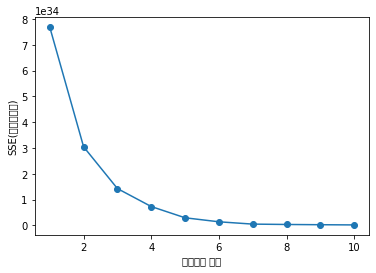

In [38]:
# 최적의 클러스터 개수 선정
def elbow(X):
    sse=[]
    for i in range(1,11):
        km = KMeans(n_clusters=i, init='k-means++', random_state=0)
        km.fit(X)
        sse.append(km.inertia_)
        
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel("클러스터 개수")
    plt.ylabel("SSE(오차제곱합)")
    plt.show()
       
elbow(new_X)

4개 정도의 클러스터가 사용되면 괜찮을 것 같다.

In [39]:
# # 클러스터링 진행

# kmeans = KMeans(n_clusters=4, random_state=42).fit(new_X)
# new_X['cluster'] = kmeans.predict(new_X)
# new_test['cluster'] = kmeans.predict(new_test)

## 3.9 최종 데이터 확인 및 저장


In [40]:
# 학습 데이터 기본 정보 파악
display(new_X.info())

display(new_X.head().T)

display(new_X.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31684 entries, 0 to 31683
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   송하인_격자공간고유번호  31684 non-null  object
 1   수하인_격자공간고유번호  31684 non-null  object
 2   물품_카테고리       31684 non-null  int64 
 3   송하인_광역시       31684 non-null  object
 4   송하인_시군구       31684 non-null  object
 5   송하인_읍면동       31684 non-null  object
 6   송하인_리         31684 non-null  object
 7   송하인_기타        31684 non-null  object
 8   수하인_광역시       31684 non-null  object
 9   수하인_시군구       31684 non-null  object
 10  수하인_읍면동       31684 non-null  object
 11  수하인_리         31684 non-null  object
 12  수하인_기타        31684 non-null  object
dtypes: int64(1), object(12)
memory usage: 3.1+ MB


None

,0,1,2,3,4
송하인_격자공간고유번호,5011000595017300,4148000690043300,5011000078068400,4127100048006400,5011000078068400
수하인_격자공간고유번호,2871000192069300,5011000264024400,1120000007005400,5011000587019400,2823700010076300
물품_카테고리,67,34,27,17,27
송하인_광역시,50,41,50,41,50
송하인_시군구,110,480,110,271,110
송하인_읍면동,005,006,000,000,000
송하인_리,95,90,78,48,78
송하인_기타,017300,043300,068400,006400,068400
수하인_광역시,28,50,11,50,28
수하인_시군구,710,110,200,110,237


,물품_카테고리
count,31684.000000
mean,31.810409
std,16.899420
min,0.000000
25%,27.000000
50%,27.000000
75%,27.000000
max,99.000000


In [41]:
display(new_test.info())

display(new_test.head().T)

display(new_test.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   송하인_격자공간고유번호  7920 non-null   object
 1   수하인_격자공간고유번호  7920 non-null   object
 2   물품_카테고리       7920 non-null   int64 
 3   송하인_광역시       7920 non-null   object
 4   송하인_시군구       7920 non-null   object
 5   송하인_읍면동       7920 non-null   object
 6   송하인_리         7920 non-null   object
 7   송하인_기타        7920 non-null   object
 8   수하인_광역시       7920 non-null   object
 9   수하인_시군구       7920 non-null   object
 10  수하인_읍면동       7920 non-null   object
 11  수하인_리         7920 non-null   object
 12  수하인_기타        7920 non-null   object
dtypes: int64(1), object(12)
memory usage: 804.5+ KB


None

,0,1,2,3,4
송하인_격자공간고유번호,4167000577042200,1156000009012200,4122000363057300,5011000436041400,4150000241065200
수하인_격자공간고유번호,5011000435014100,5011000172034400,5011000361097300,2826000084036400,5011000169044300
물품_카테고리,47,12,88,58,39
송하인_광역시,41,11,41,50,41
송하인_시군구,670,560,220,110,500
송하인_읍면동,005,006,000,000,000
송하인_리,77,09,63,36,41
송하인_기타,042200,012200,057300,041400,065200
수하인_광역시,50,50,50,28,50
수하인_시군구,110,110,110,260,110


,물품_카테고리
count,7920.000000
mean,31.822980
std,16.923551
min,0.000000
25%,27.000000
50%,27.000000
75%,27.000000
max,99.000000


In [42]:
# 데이터 저장
new_X.to_csv("/content/drive/Shareddrives/A-2/심종수/Trans/prepro/new_X_{}.csv".format(today),index = False, encoding = "cp949")
y.to_csv("/content/drive/Shareddrives/A-2/심종수/Trans/prepro/y_{}.csv".format(today),index = False, encoding = "cp949")
new_test.to_csv("/content/drive/Shareddrives/A-2/심종수/Trans/prepro/new_test_{}.csv".format(today),index = False, encoding = "cp949")

# 4. 데이터 분할

## 4.1 데이터 분할

In [43]:
#앞에 저장한 데이터 로드

X = pd.read_csv("/content/drive/Shareddrives/A-2/심종수/Trans/prepro/new_X_{}.csv".format(today), encoding = "cp949")
y = pd.read_csv("/content/drive/Shareddrives/A-2/심종수/Trans/prepro/y_{}.csv".format(today), encoding = "cp949")
test = pd.read_csv("/content/drive/Shareddrives/A-2/심종수/Trans/prepro/new_test_{}.csv".format(today), encoding = "cp949")

In [44]:
# 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y["운송장_건수"],test_size = 0.20, random_state = 42)

In [45]:
# AutoML을 위한 데이터셋 변형
X = pd.concat([X,y],axis = 1 )
display(X)
display(test)

,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,송하인_광역시,송하인_시군구,송하인_읍면동,송하인_리,송하인_기타,수하인_광역시,수하인_시군구,수하인_읍면동,수하인_리,수하인_기타,운송장_건수
0,5011000595017300,2871000192069300,67,50,110,5,95,17300,28,710,1,92,69300,3
1,4148000690043300,5011000264024400,34,41,480,6,90,43300,50,110,2,64,24400,3
2,5011000078068400,1120000007005400,27,50,110,0,78,68400,11,200,0,7,5400,3
3,4127100048006400,5011000587019400,17,41,271,0,48,6400,50,110,5,87,19400,7
4,5011000078068400,2823700010076300,27,50,110,0,78,68400,28,237,0,10,76300,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31679,4471000290087200,5011000213073200,55,44,710,2,90,87200,50,110,2,13,73200,3
31680,1129000014045300,5011000319087100,52,11,290,0,14,45300,50,110,3,19,87100,4
31681,1129000014045300,5011000263065200,52,11,290,0,14,45300,50,110,2,63,65200,6
31682,4127300065073100,5011000264061200,79,41,273,0,65,73100,50,110,2,64,61200,7


,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,송하인_광역시,송하인_시군구,송하인_읍면동,송하인_리,송하인_기타,수하인_광역시,수하인_시군구,수하인_읍면동,수하인_리,수하인_기타
0,4167000577042200,5011000435014100,47,41,670,5,77,42200,50,110,4,35,14100
1,1156000009012200,5011000172034400,12,11,560,6,9,12200,50,110,1,72,34400
2,4122000363057300,5011000361097300,88,41,220,0,63,57300,50,110,3,61,97300
3,5011000436041400,2826000084036400,58,50,110,0,36,41400,28,260,0,84,36400
4,4150000241065200,5011000169044300,39,41,500,0,41,65200,50,110,1,69,44300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7915,5011000266051200,4623000417038100,27,50,110,5,66,51200,46,230,4,17,38100
7916,1154500001098300,5011000264055100,34,11,545,0,1,98300,50,110,2,64,55100
7917,5013000610049100,1147000018091400,27,50,130,5,10,49100,11,470,0,18,91400
7918,5013000610049100,3117000039026100,27,50,130,9,10,49100,31,170,0,39,26100


## 4.2 데이터 교차검증

# 5. 모델링

## 5.1 모델 선정을 위한 AutoML 활용

In [46]:
# for "4. Modeling with Pycaret"
# import warnings
# warnings.filterwarnings('ignore')
# import random
# from pycaret.classification import *
import sklearn
from pycaret.regression import *

In [47]:
reg = setup(X, 
            preprocess = False, # True로 설정되면, 자체적인 Feature Engineering을 추가로 진행해 Predict가 불가능해진다.
            train_size = 0.999,  # 우리는 전체 데이터를 학습해 test를 예측하는게 목표이기 때문에, 0.999로 설정한다.
            target = "운송장_건수", # 목표 변수.
            silent = True,
            use_gpu = True, # GPU가 있으면 사용하세요 (Cat BOost 속도 향상)
            numeric_features=list(X.drop(columns = ["운송장_건수"]).columns), # 모든 변수가 숫자로써의 의미가 있다.
            session_id = 2021,
            fold_shuffle = True
            )

,Description,Value
0,session_id,2021
1,Target,운송장_건수
2,Original Data,"(31684, 14)"
3,Missing Values,False
4,Numeric Features,13
5,Categorical Features,0
6,Transformed Train Set,"(31652, 13)"
7,Transformed Test Set,"(32, 13)"
8,Shuffle Train-Test,True
9,Stratify Train-Test,False


In [48]:
model_py = compare_models(n_select = 1, sort = 'RMSE',exclude = ["rf",'et', 'knn'])


# 포함하여 모델 탐색
# best_specific = compare_models(include = ['dt','rf','xgboost'])
# 제거하여 모델 탐색
# best_specific = compare_models(exclude = ['catboost', 'svm'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,2.3226,38.9161,6.1550,0.1116,0.4314,0.4386,0.337
gbr,Gradient Boosting Regressor,2.3336,40.3410,6.2623,0.0832,0.4265,0.4428,3.736
lasso,Lasso Regression,2.4147,45.4328,6.5977,0.0063,0.4382,0.4609,0.740
br,Bayesian Ridge,2.4148,45.4348,6.5979,0.0062,0.4382,0.4610,0.111
en,Elastic Net,2.4148,45.4379,6.5981,0.0062,0.4382,0.4610,0.851
lr,Linear Regression,2.4164,45.5030,6.6029,0.0048,0.4386,0.4616,0.079
ridge,Ridge Regression,2.4314,45.5195,6.6034,0.0047,0.4420,0.4652,0.075
omp,Orthogonal Matching Pursuit,2.4153,45.5238,6.6045,0.0042,0.4388,0.4615,0.040
llar,Lasso Least Angle Regression,2.4212,45.6930,6.6182,-0.0003,0.4395,0.4631,0.039
dummy,Dummy Regressor,2.4212,45.6930,6.6182,-0.0003,0.4395,0.4631,0.007


In [54]:
tune_model(model_py, 
           optimize = 'RMSE', 
           choose_better = True,
           n_iter = 20)

final_model = finalize_model(model_py)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.1792,23.2712,4.8240,0.0386,0.4213,0.4298
1,2.2792,29.0277,5.3877,0.0397,0.4288,0.4259
2,2.2560,29.2707,5.4102,0.0596,0.4312,0.4391
3,2.3325,40.8763,6.3935,0.0393,0.4341,0.4315
4,2.3673,74.5711,8.6355,0.1669,0.4318,0.4219
5,2.4646,42.2043,6.4965,0.2738,0.4474,0.4419
6,2.3264,44.3140,6.6569,0.0720,0.4290,0.4206
7,2.2371,28.4176,5.3308,-0.0310,0.4338,0.4345
8,2.3723,50.3520,7.0959,0.2503,0.4316,0.4348
9,2.2964,30.5834,5.5302,0.2077,0.4299,0.4407


In [56]:
display(final_model.feature_importances_)
display(X_train.columns)

df_import = pd.DataFrame({"열이름" : X_train.columns, "중요도" : final_model.feature_importances_})
df_import.sort_values(by = "중요도")

array([226, 146, 414,   1, 256, 164, 314, 558,   0, 166,  77, 285, 393],
      dtype=int32)

Index(['송하인_격자공간고유번호', '수하인_격자공간고유번호', '물품_카테고리', '송하인_광역시', '송하인_시군구',
       '송하인_읍면동', '송하인_리', '송하인_기타', '수하인_광역시', '수하인_시군구', '수하인_읍면동', '수하인_리',
       '수하인_기타'],
      dtype='object')

,열이름,중요도
8,수하인_광역시,0
3,송하인_광역시,1
10,수하인_읍면동,77
1,수하인_격자공간고유번호,146
5,송하인_읍면동,164
9,수하인_시군구,166
0,송하인_격자공간고유번호,226
4,송하인_시군구,256
11,수하인_리,285
6,송하인_리,314


In [57]:
# RMSE
import numpy as np
from sklearn.metrics import mean_squared_error 

pred_train = final_model.predict(X_train)
MSE_train = mean_squared_error(y_train, pred_train)
display("훈련 셋 데이터 : ",np.sqrt(MSE_train))

pred_test = final_model.predict(X_test)
MSE = mean_squared_error(y_test, pred_test)
display("테스트 셋 데이터 : ",np.sqrt(MSE))

'훈련 셋 데이터 : '

5.4916799681611534

'테스트 셋 데이터 : '

5.294271822728408

[1차 - 10번 반복]
훈련 셋 데이터 : 
5.4916799681611534

테스트 셋 데이터 : 
5.294271822728408

In [ ]:
# # 앞서 선택한 5가지 모델 튜닝
# models = []
# for m in top3:
#     models.append(tune_model(m, 
#                              optimize = 'RMSE', 
#                              choose_better = True,
#                             n_iter = 10))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.1789,22.5906,4.7530,0.0667,0.4171,0.4287
1,2.2266,27.4481,5.2391,0.0920,0.4166,0.4184
2,2.3265,41.4644,6.4393,-0.3321,0.4329,0.4534
3,2.3412,40.9296,6.3976,0.0380,0.4334,0.4361
4,2.3669,63.0836,7.9425,0.2952,0.4292,0.4263
5,2.4225,35.0048,5.9165,0.3977,0.4414,0.4491
6,2.3519,47.2562,6.8743,0.0104,0.4228,0.4271
7,2.2656,30.2788,5.5026,-0.0986,0.4327,0.4437
8,2.3853,45.9578,6.7792,0.3157,0.4316,0.4469
9,2.2437,28.6751,5.3549,0.2571,0.4226,0.4320


IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,06:51:07
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
# # 튜닝된 모델 앙상블
# voting = blend_models(models, optimize = 'RMSE')

# # 앙상블된 모델 최적화
# voting = tune_model(voting, 
#                  optimize = 'RMSE', 
#                  choose_better = True,
#                  n_iter = 10)

# voting = finalize_model(voting)


In [50]:
pred = final_model.predict(test)

sub.iloc[:,1] = pred

display(sub)

,index,운송장_건수
0,0,4.475737
1,1,4.622612
2,2,2.808987
3,3,4.911669
4,4,4.425961
...,...,...
7915,7915,5.244671
7916,7916,4.118487
7917,7917,4.041848
7918,7918,4.358565


In [51]:
# 제출파일 생성
sub.to_csv("/content/drive/Shareddrives/A-2/심종수/Trans/sub/sub_{}_auto.csv".format(today),index=False)

## 5.2 모델선정

### 5.2.1 RF

In [45]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor
model_name = 'RF'

model = RandomForestRegressor(random_state = 42)
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.8578690403229845

In [52]:
display(model.feature_importances_)
display(X_train.columns)

df_import = pd.DataFrame({"열이름" : X_train.columns, "중요도" : model.feature_importances_})
df_import.sort_values(by = "중요도")

array([0.03389936, 0.06325877, 0.06552844, 0.033003  , 0.00753868,
       0.04258844, 0.03059715, 0.07937663, 0.21639054, 0.01261018,
       0.04514066, 0.04625641, 0.14422313, 0.17958861])

Index(['송하인_격자공간고유번호', '수하인_격자공간고유번호', '물품_카테고리', 'repeat', '송하인_광역시',
       '송하인_시군구', '송하인_읍면동', '송하인_리', '송하인_기타', '수하인_광역시', '수하인_시군구',
       '수하인_읍면동', '수하인_리', '수하인_기타'],
      dtype='object')

,열이름,중요도
4,송하인_광역시,0.007539
9,수하인_광역시,0.012610
6,송하인_읍면동,0.030597
3,repeat,0.033003
0,송하인_격자공간고유번호,0.033899
5,송하인_시군구,0.042588
10,수하인_시군구,0.045141
11,수하인_읍면동,0.046256
1,수하인_격자공간고유번호,0.063259
2,물품_카테고리,0.065528


#### 5.2.1.1 최적의 하이퍼파라미터 설정


In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [47]:
para = {'max_depth' : [8,12,16],
           'min_samples_leaf' : [2,4],
           'min_samples_split' : [2,4]}

# 랜덤포레스트 모델 생성
rf = RandomForestRegressor(random_state = 42)
#그리드 서치 모델
gs = GridSearchCV(rf, param_grid = para, cv = 3)
#그리드 서치하며 학습
gs.fit(X_train,y_train)
#최적의 모델 선정
gs_best = gs.best_estimator_

display(gs.best_score_)
display(gs.best_params_)


0.12182770099552798

{'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [48]:
display(gs_best.score(X_train,y_train))

0.41412223857019104

In [51]:
display(gs_best.feature_importances_)
display(X_train.columns)

df_import = pd.DataFrame({"열이름" : X_train.columns, "중요도" : gs_best.feature_importances_})
df_import.sort_values(by = "중요도")

array([0.03051002, 0.03677274, 0.09881546, 0.03712178, 0.00591035,
       0.05445175, 0.03410408, 0.09159355, 0.35076651, 0.005329  ,
       0.03309473, 0.01805998, 0.08187939, 0.12159065])

Index(['송하인_격자공간고유번호', '수하인_격자공간고유번호', '물품_카테고리', 'repeat', '송하인_광역시',
       '송하인_시군구', '송하인_읍면동', '송하인_리', '송하인_기타', '수하인_광역시', '수하인_시군구',
       '수하인_읍면동', '수하인_리', '수하인_기타'],
      dtype='object')

,열이름,중요도
9,수하인_광역시,0.005329
4,송하인_광역시,0.005910
11,수하인_읍면동,0.018060
0,송하인_격자공간고유번호,0.030510
10,수하인_시군구,0.033095
6,송하인_읍면동,0.034104
1,수하인_격자공간고유번호,0.036773
3,repeat,0.037122
5,송하인_시군구,0.054452
12,수하인_리,0.081879


#### 5.2.1.2 모델 성능 평가RMSE 평가 지표 확인

In [53]:
# RMSE
import numpy as np
from sklearn.metrics import mean_squared_error 

pred_train = gs_best.predict(X_train)
MSE_train = mean_squared_error(y_train, pred_train)
display("훈련 셋 데이터 : ",np.sqrt(MSE_train))

pred_test = gs_best.predict(X_test)
MSE = mean_squared_error(y_test, pred_test)
display("테스트 셋 데이터 : ",np.sqrt(MSE))

'훈련 셋 데이터 : '

5.376081656002664

'테스트 셋 데이터 : '

5.8324133391871555

#### 5.2.1.2 최종 예측

In [58]:
pred = model.predict(test)

sub.iloc[:,1] = pred

display(sub)

,index,운송장_건수
0,0,5.88
1,1,7.60
2,2,3.72
3,3,5.56
4,4,4.38
...,...,...
7915,7915,6.14
7916,7916,4.90
7917,7917,5.54
7918,7918,4.46


In [59]:
# 제출파일 생성
sub.to_csv("/content/drive/Shareddrives/A-2/심종수/Trans/sub/sub_{}_{}.csv".format(today,model_name),index=False)

### 5.2.2 LGBM

In [140]:
# LGBM
# LGBM은 사이킷런 라이브러리에 없다.
from lightgbm import LGBMRegressor
model_name = 'LGBM'

model = LGBMRegressor(n_estimators = 100 ,random_state = 42, num_leaves = 25)
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.3580545135646659

In [133]:
display(model.feature_importances_)
display(X_train.columns)

df_import = pd.DataFrame({"열이름" : X_train.columns, "중요도" : model.feature_importances_})
df_import.sort_values(by = "중요도")

array([278, 229, 310,   6, 160, 109, 257, 410,   1,  97,  42, 212, 289])

Index(['송하인_격자공간고유번호', '수하인_격자공간고유번호', '물품_카테고리', '송하인_광역시', '송하인_시군구',
       '송하인_읍면동', '송하인_리', '송하인_기타', '수하인_광역시', '수하인_시군구', '수하인_읍면동', '수하인_리',
       '수하인_기타'],
      dtype='object')

,열이름,중요도
8,수하인_광역시,1
3,송하인_광역시,6
10,수하인_읍면동,42
9,수하인_시군구,97
5,송하인_읍면동,109
4,송하인_시군구,160
11,수하인_리,212
1,수하인_격자공간고유번호,229
6,송하인_리,257
0,송하인_격자공간고유번호,278


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49569 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50669 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_

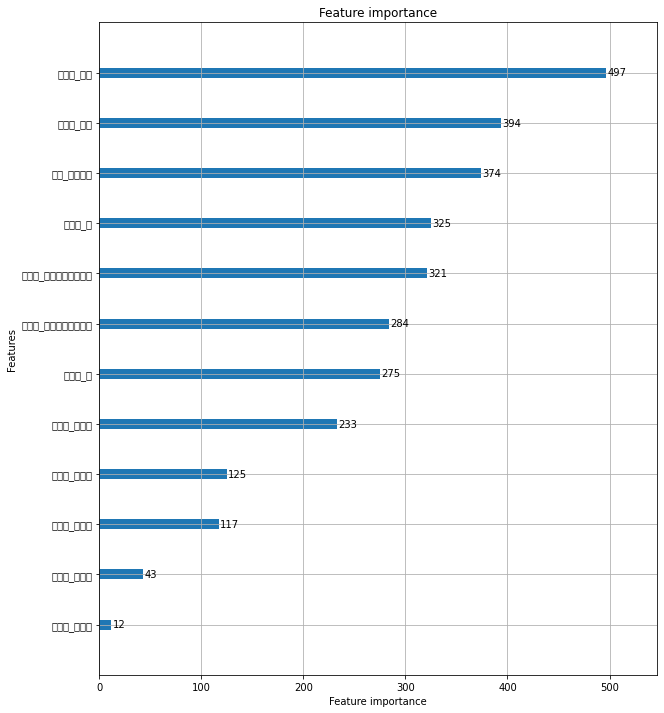

In [131]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots(figsize=(10,12))
plot_importance(model,ax=ax)

#### 5.2.1.1 최적의 하이퍼파라미터 설정


#### 5.2.1.2 모델 성능 평가RMSE 평가 지표 확인

In [141]:
# RMSE
import numpy as np
from sklearn.metrics import mean_squared_error 

pred_train = model.predict(X_train)
MSE_train = mean_squared_error(y_train, pred_train)
display("훈련 셋 데이터 : ",np.sqrt(MSE_train))

pred_test = model.predict(X_test)
MSE = mean_squared_error(y_test, pred_test)
display("테스트 셋 데이터 : ",np.sqrt(MSE))

'훈련 셋 데이터 : '

5.521606687544909

'테스트 셋 데이터 : '

5.875257779589545

[1차 시도]

훈련 셋 데이터 : 
4.470921260119756

테스트 셋 데이터 : 
6.043503886452078
- 딱 이것만 봤을때는 과적합이라고... 판단....


[2차 시도]

훈련 셋 데이터 : 
5.03666922052688

테스트 셋 데이터 : 
5.9567700977112255

나아지는 듯한 모습을 보이지는 않는다...

#### 5.2.1.2 최종 예측

In [142]:
pred = model.predict(test)

sub.iloc[:,1] = pred

display(sub)

,index,운송장_건수
0,0,4.936478
1,1,4.024106
2,2,3.694345
3,3,5.051819
4,4,4.437773
...,...,...
7915,7915,5.086067
7916,7916,3.278780
7917,7917,3.761482
7918,7918,3.998450


In [143]:
# 제출파일 생성
sub.to_csv("/content/drive/Shareddrives/A-2/심종수/Trans/sub/sub_{}_{}.csv".format(today,model_name),index=False)

# 총 평
- [1229]
  - 1) gbr, lightgbm, randomforest 등 모델이 좋은 성능을 보일것으로 예상

- [0103]
  - 1) kmeans 클러스터링 최적의 클러스터 개수 선정을 위해 elbow 기법 활용 -> 클러스터링의 특성 중요도가 상당히 낮다... 회귀에 도움이 되지않는다.
  - 2) 원-핫 인코딩대신 라벨 인코딩 활용

- [0104]
  - 1) "repeat"열은 제거하여 학습 -> 근거 : 특성중요도
  - 2) 행정동코드를 활용하여 격자코드 분류하여 사용:
    - 1. 광역시 코드 등 너무 낮은 특성중요도를 보이는 코드들이 존재 
    -> 결합하거나 제거하는 방향 고려

  - 3) LGBM을 활용하여 사용했는데 눈에 띄는 성능 향상은 보이지 못함
    - 하이퍼파라미터 조정.

  - [진행 예정] 
    - 1) 특성중요도 낮은 열 결합 및 제거
    - 2) pycaret을 활용하여 자동 튜닝